# DATA 485 Capstone - EDA

Housekeeping Items

In [2]:
# Run this before any other block of code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the cleaned dataset 

Air_df = pd.read_csv("/content/newFile.csv")


In [4]:
# Remove any NaN values from the imported dataset

Air_df = Air_df.dropna()


In [5]:
print(Air_df)


                                            description neighbourhood_group  \
0     FIR - Large Private room in Lake Forest with sink           Lake City   
1     Water-view retreat with deck, grill, paddleboa...      Rainier Valley   
2     ALKI BEACH-AMAZING SEATTLE STEPS 2 BEACH/BOARD...        West Seattle   
4      Family-friendly home w/ fast wifi & a large yard           Northgate   
5        The Blue Spruce | Spacious and Homey Gathering           Lake City   
...                                                 ...                 ...   
5899     White Center  studio with kitchenette and bath            Delridge   
5900       Lovely 1-bedroom condo next door to Gum Wall            Downtown   
5901                                Home away from home            Delridge   
5902  Brick duplex- 10 min to downtown- 10 min to SE...            Delridge   
5903  Cozy  2-bedroom apartment with free onsite par...      Rainier Valley   

            room_type  price  minimum_nights  numbe

Basic Statistics

In [6]:
# Summary statistics for price

Air_df['price'].describe()


count    5034.000000
mean      182.319825
std       123.608193
min         0.000000
25%       106.000000
50%       150.000000
75%       222.000000
max      2000.000000
Name: price, dtype: float64

In [18]:
# Average number of days available out of 365 calendar year

average_annual_availability = Air_df['availability_365'].mean()
average_annual_availability = round(average_annual_availability,0)
print(f"Average annual availability: {average_annual_availability} out of 365 days")


Average annual availability: 179.0 out of 365 days


In [17]:
# Estimating occupancy rates

estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate = round(estimated_annual_occupancy_rate,2)
print(f"Estimated annual occupancy rate: {estimated_annual_occupancy_rate}%")


Estimated annual occupancy rate: 50.89%


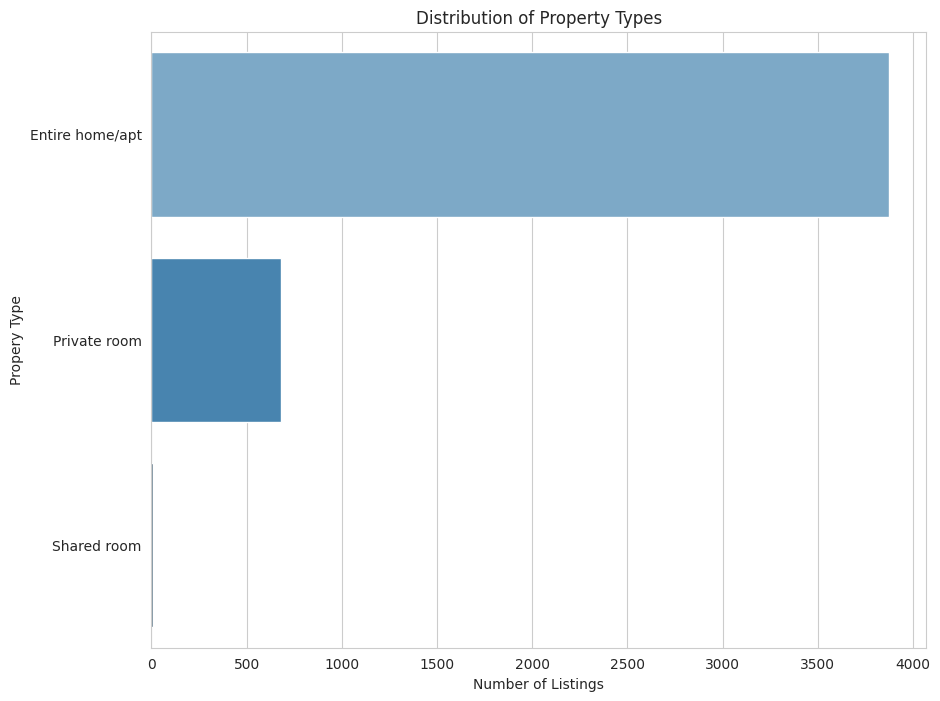

In [ ]:
# Distribution of Property Types

sns.set_style("whitegrid")  # Set the aesthetic style of the plots

# Calculate teh distribution of the property types

property_type_counts = Air_df['room_type'].value_counts()

# Create a bar chart for the distribution of propery types

plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="Blues_d")
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.show()

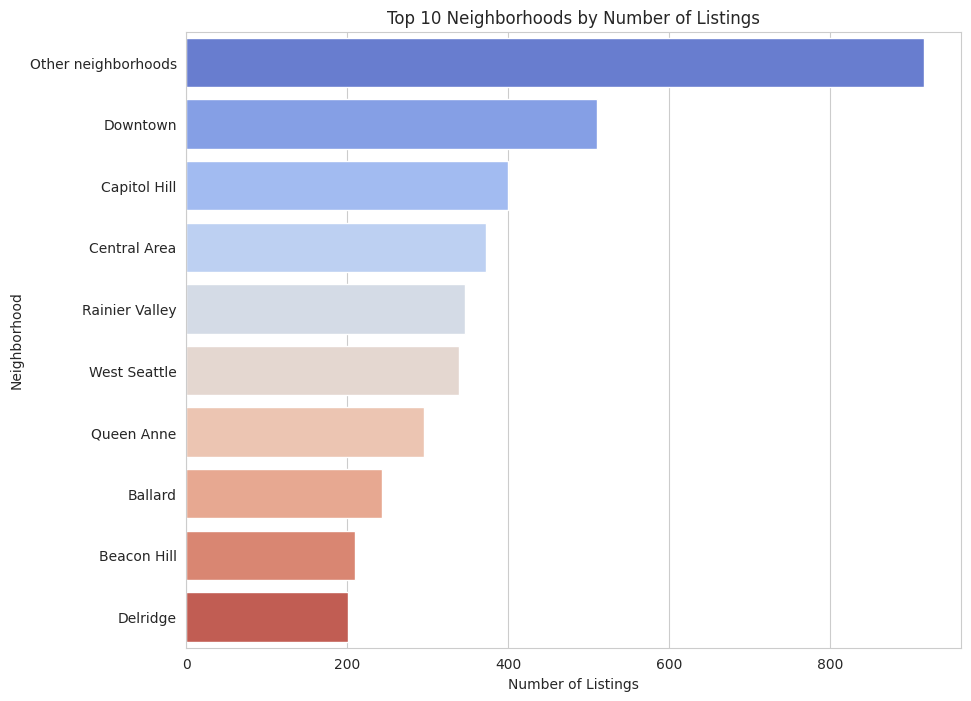

In [ ]:
# Distribution of Neighborhoods

neighborhood_counts = Air_df['neighbourhood_group'].value_counts().head(10)
# Calculate the distribution of listings by neighborhood

# Create a bar chart for the top neighborhoods with the most listings

plt.figure(figsize=(10, 8))
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="coolwarm")
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()


Advanced Statistical Analysis

In [ ]:
# Performing a linear regression analysis on Air_df


# Define the dependent and independent variables
y = Air_df['price']
X = Air_df[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     29.54
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.27e-29
Time:                        04:35:07   Log-Likelihood:                -28377.
No. Observations:                4568   AIC:                         5.677e+04
Df Residuals:                    4562   BIC:                         5.680e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1]:
# Based on the output from the linear regression model:

# The R-squared value of 0.031 indicates that the model only explains a very small 
# portion (around 3.1%) of the variance in the price of Airbnb listings. 
# This suggests that other factors beyond the chosen independent variables
# might play a more significant role in determining price.

# All the independent variables (except reviews_per_month) 
# have p-values less than 0.05, indicating a statistically significant 
# relationship with price at a 95% confidence level.

# Reviews_per_month has a p-value of 0.079, which is borderline significant.
# It suggests a weak or possibly no statistically significant relationship
# with price based on this model.

# Minimum nights, number of reviews, calculated_host_listings_count, and 
# availability_365 all have negative coefficients. 
# This suggests that listings with higher values for these features 
# tend to have lower predicted prices according to the model. 
# However, the magnitude of these effects might be small 
# based on the coefficient values.

# Note to self: Maybe include additional features in the model
# Explore data transformation techniques for some features if they are skewed.


Principal Component Analysis

In [10]:
# We have to drop any columns with text in order to perform PCA
# Get all columns with object data type
text_cols = Air_df.select_dtypes(include='object').columns

# Drop the text columns
Air_df.drop(text_cols, axis=1, inplace=True)

# Print the updated DataFrame
print(Air_df)


      price  minimum_nights  number_of_reviews  reviews_per_month  \
0        42               1                  9               2.52   
1       194               3                  2               1.50   
2       595              30                 20               0.32   
4       248               3                  7               2.47   
5       362               3                  2               1.40   
...     ...             ...                ...                ...   
5899    125               3                 16               1.10   
5900    184               1                 22               9.17   
5901    175               3                  5               0.36   
5902    109               1                 21               1.33   
5903    204               2                 15               3.98   

      calculated_host_listings_count  availability_365  
0                                  7               364  
1                                 46               360  


In [11]:
# Performing Principal component analysis on the dataframe
from sklearn.decomposition import PCA

# Standardize the data
X_scaled = (Air_df - Air_df.mean()) / Air_df.std()

# Create a PCA instance with 3 principal components
pca = PCA(n_components=3)

# Fit the PCA instance to the data
pca.fit(X_scaled)

# Print the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

# Transform the data using the fitted PCA instance
X_pca = pca.transform(X_scaled)

# Print the first 3 rows of the transformed data
print(X_pca[0:3,:])

[0.3101327  0.18532663 0.17583332]
[[-0.19525182 -0.56051473  0.83656565]
 [-0.92744059  0.21967784  1.31649252]
 [-1.31300219  2.69733975 -0.28907743]]


In [12]:
# Analyze the PCA loadings
loadings = pca.components_

# Print the loadings for the first 3 components
print("\nLoadings for the first 3 components:")
for i in range(3):
  print(f"Component {i+1}:", loadings[i])
  


Loadings for the first 3 components:
Component 1: [-0.02930263 -0.47952406  0.4801602   0.58207255 -0.38933668 -0.21966499]
Component 2: [ 0.78982635 -0.32082163 -0.4080963  -0.11945421 -0.28179725 -0.11413251]
Component 3: [ 0.27724625 -0.22808511  0.14095136  0.27299629  0.39852564  0.78606282]


In [13]:
# Feeature (Column) names
feature_names = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
                 "calculated_host_listings_count", "availability_365"]

# Analyze top features contributing to each component

# Component 1
print("\nTop features contributing to Component 1:")
top_indices = loadings[0].argsort()[-3:][::-1]  # Descending order
for i in top_indices:
  print(f"- {feature_names[i]} ({loadings[0][i]:.2f})")

# Component 2
print("\nTop features contributing to Component 2:")
top_indices = loadings[1].argsort()[-3:][::-1]  # Descending order
for i in top_indices:
  print(f"- {feature_names[i]} ({loadings[1][i]:.2f})")

# Component 3
print("\nTop features contributing to Component 3:")
top_indices = loadings[2].argsort()[-3:][::-1]  # Descending order
for i in top_indices:
  print(f"- {feature_names[i]} ({loadings[2][i]:.2f})")
  


Top features contributing to Component 1:
- reviews_per_month (0.58)
- number_of_reviews (0.48)
- price (-0.03)

Top features contributing to Component 2:
- price (0.79)
- availability_365 (-0.11)
- reviews_per_month (-0.12)

Top features contributing to Component 3:
- availability_365 (0.79)
- calculated_host_listings_count (0.40)
- price (0.28)


In [ ]:
# Based on the signs and the features with high loadings:

# Component 1: Popularity and Value
# This component appears to capture a combination of popularity and potential value for the listing.
# Positive loadings on "Number of Reviews" and "Reviews per Month" suggest listings with
# higher engagement contribute more. The slightly negative loading on "Price" might indicate
# some balance between popularity and affordability within this component.
# Listings with good reviews but a slightly lower price might score higher here.

# Component 2: Pure Pricing and Availability
# This component seems to focus primarily on price and availability. A strong positive
# loading on "Price" suggests listings with higher prices contribute more to this component.
#  A negative loading on "Availability (days)" indicates listings with fewer available days
# (potentially due to high demand) contribute more. You might consider this component when
# setting prices for high-demand periods or adjusting prices based on availability.

# Component 3: Established Hosts and Long-Term Availability
# This component might be related to established hosts with listings that are frequently
# available. The strong positive loading on "Availability" suggests listings with
# higher overall availability contribute more. A positive loading on "Calculated Host Listings Count"
# might indicate frequent listings from hosts contribute more. You might consider
# this component when setting base prices or offering discounts for longer stays.

# Price Strategy and Suggestions:

#  - Consider increasing prices for listings with high "Number of Reviews" and "Reviews per Month"
#    (Component 1), but be mindful of maintaining some value perception.
#  - During high-demand periods, you might consider raising prices based on Component 2
#    (focusing on maximizing income) or adjusting based on remaining availability.
#  - For established hosts with high "Availability" and potentially more experience
#    (Component 3), you could offer slightly lower base prices or discounts for longer stays.
